# Exercise 3. Fruit Flies

![picture 3](../images/7f174e16e99a70ca7e1d64c76743e52c1b6aa296944479dbaaeae3b29b8a75f0.png)  

### 3a)  Make an informative plot of the data. Investigate whether sexual activity influences longevity by performing a statistical test, without taking the thorax length into account. What are the estimated longevities for the three conditions? Comment.

In [2]:
fruitflies = read.table('fruitflies.txt', header=T)
fruitflies$loglongevity = log(fruitflies$longevity)
attach((fruitflies))
head(fruitflies)

thorax,longevity,activity,loglongevity
0.64,40,isolated,3.688879
0.70,37,isolated,3.610918
0.72,44,isolated,3.784190
0.72,47,isolated,3.850148
0.72,47,isolated,3.850148
0.76,47,isolated,3.850148


#### Make an informative plot of the data.

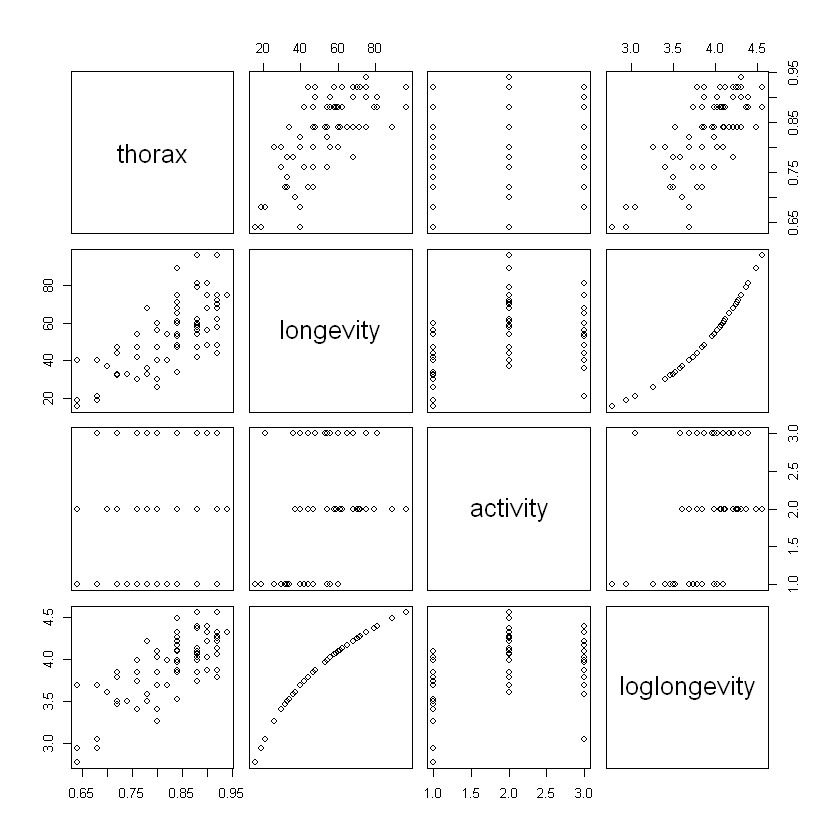

In [3]:
pairs(fruitflies)

### Investigate whether sexual activity influences longevity by performing a statistical test, without taking the thorax length into account. 

In [4]:
fruitflies$activity = factor(fruitflies$activity)
fruitaov = lm(fruitflies$loglongevity ~ fruitflies$activity)
anova(fruitaov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
fruitflies$activity,2,3.666493,1.83324651,19.42061,1.797719e-07
Residuals,72,6.796579,0.09439694,NA,NA


In [5]:
summary(fruitaov)


Call:
lm(formula = fruitflies$loglongevity ~ fruitflies$activity)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95531 -0.13338  0.02552  0.20891  0.49222 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  3.60212    0.06145  58.621  < 2e-16 ***
fruitflies$activityisolated  0.51722    0.08690   5.952 8.82e-08 ***
fruitflies$activitylow       0.39771    0.08690   4.577 1.93e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3072 on 72 degrees of freedom
Multiple R-squared:  0.3504,	Adjusted R-squared:  0.3324 
F-statistic: 19.42 on 2 and 72 DF,  p-value: 1.798e-07


#### obligatory residuals check:


	Shapiro-Wilk normality test

data:  (residuals(fruitaov))
W = 0.95431, p-value = 0.008652


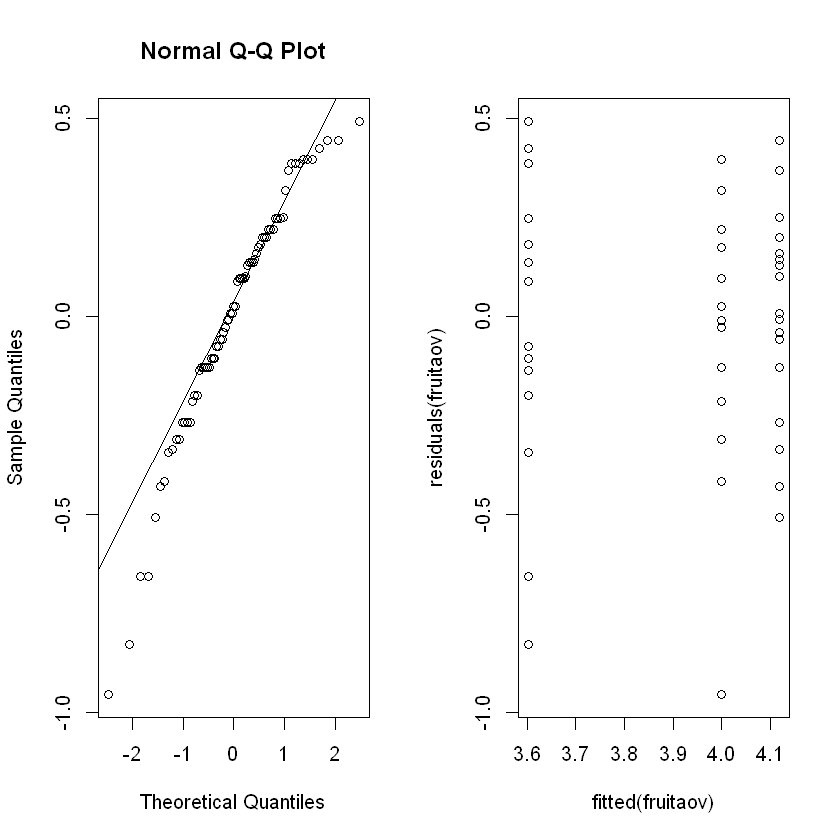

In [6]:
par(mfrow=c(1, 2))
qqnorm(residuals(fruitaov)); qqline(residuals(fruitaov)); plot(fitted(fruitaov), residuals(fruitaov)); shapiro.test((residuals(fruitaov)))

### Sadly data does not appear normal so we proceed with a kruskal wallis:

In [7]:
kruskal.test(fruitflies$loglongevity, fruitflies$activity)


	Kruskal-Wallis rank sum test

data:  fruitflies$loglongevity and fruitflies$activity
Kruskal-Wallis chi-squared = 27.444, df = 2, p-value = 1.098e-06


#### Clearly different type of activity has an affect on longevity (in this case I used loglongevity, as was stated in the assignment on canvas)

#### What are the estimated longevities for the three conditions? Comment.

In [8]:
isolated <- subset(fruitflies, fruitflies$activity == 'isolated')
low <- subset(fruitflies, fruitflies$activity == 'low')
high <- subset(fruitflies, fruitflies$activity == 'high')

mean(isolated$longevity); mean(low$longevity); mean(high$longevity)

[1] 63.56

[1] 56.76

[1] 38.72

#### Sex kills

### 3b Investigate whether sexual activity influences longevity by performing a statistical test, now including thorax length as an explanatory variable into the analysis. 

In [9]:
fruitova = lm(loglongevity~thorax  * activity, data=fruitflies)
anova(fruitova); shapiro.test(residuals(fruitova)); summary(fruitova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
thorax,1,5.4321872,5.43218720,135.619477,6.023067e-18
activity,2,2.1129016,1.05645080,26.375252,3.101360e-09
thorax:activity,2,0.1542146,0.07710729,1.925053,1.536215e-01
Residuals,69,2.7637691,0.04005462,NA,NA



	Shapiro-Wilk normality test

data:  residuals(fruitova)
W = 0.9794, p-value = 0.2607



Call:
lm(formula = loglongevity ~ thorax * activity, data = fruitflies)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49803 -0.15920 -0.00031  0.14624  0.35984 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.5978     0.4192   1.426   0.1584    
thorax                    3.7554     0.5216   7.199 5.78e-10 ***
activityisolated          1.5465     0.5845   2.646   0.0101 *  
activitylow               0.9717     0.6423   1.513   0.1349    
thorax:activityisolated  -1.3929     0.7122  -1.956   0.0545 .  
thorax:activitylow       -0.8539     0.7794  -1.096   0.2771    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2001 on 69 degrees of freedom
Multiple R-squared:  0.7359,	Adjusted R-squared:  0.7167 
F-statistic: 38.44 on 5 and 69 DF,  p-value: < 2.2e-16


### Data is normal so ancova is able to be used. Sexual activity has a significant effect on longevity as seen in the anova table. And as seen in the summary, being isolated significantly increases the longevity compared to the intercept, meaning sexual activity decreases longevity.
#### What are the estimated longevities for the three groups, for flies with the minimal and maximal thorax lengths?

In [10]:
# # For the minimal thorax lengths:
# min_thorax = subset(fruitflies, thorax == min(thorax)) 
# max_thorax = subset(fruitflies, thorax == max(thorax)) 
# head(min_thorax); head(max_thorax)

#B)

#log convertor to number
#https://www.omnicalculator.com/math/natural-log

fruitavo2 = lm(longevity~thorax + activity, data=fruitflies)
anova(fruitavo2)
shapiro.test(residuals(fruitavo2))
summary(fruitavo2)

#better to use drop1, so both activity and thorax are the right p-values in ancova
drop1(fruitavo2,test="F")  

# does sexual activity increase or decrease longevity?
# --> does decrease (look at summary table)
# isolated is largest value, larger than low. Low on its turn is larger than a1 (cuz a1 = 0)
# so it can be observed that sex activity decreases longevity!


#What are the estimated longevities for the three groups, for flies with the minimal and maximal thorax lengths?
# --> okay so the (linear) formula is basically now: mu + Beta*x + alpha + e
# using non-log instead of log for clarification
# running summary of fruitavo2 results in the beta, alphas and mu.
# respectively: mu=-67.375, beta=132.618, a1=0 (by default), a2=20.066, a3=13.054  
# now it's asked to calculate the ESTIMATES for the 3 groups, for flies with minimal and maximal thorax lenghts
# Looking in the fruitflies table, we see that the min thorax lenght is 0.64 and the max lenght in 0.94

# so starting with minimum, fill in the formula above with x=0.64
# -activity high: -67.375 + 132.618*0.64 + 0 = 17.50052
# -activity low:  -67.375 + 132.618*0.64 + 13.054 = 30.55452
# -activity iolated:  -67.375 + 132.618*0.64 + 20.066 = 37.56652

# now for the max thorax lenght, so x=0.94:
# -activity high: -67.375 + 132.618*0.94 + 0 = 57.28592
# -activity low:  -67.375 + 132.618*0.94 + 13.054 = 70.33992
# -activity iolated:  -67.375 + 132.618*0.94 + 20.066 = 77.35192

#So those are 6 estimates in total (3x2)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
thorax,1,10959.256,10959.2557,101.40854,2.557325e-15
activity,2,4966.737,2483.3683,22.97918,2.016323e-08
Residuals,71,7672.994,108.0703,NA,NA



	Shapiro-Wilk normality test

data:  residuals(fruitavo2)
W = 0.98091, p-value = 0.3176



Call:
lm(formula = longevity ~ thorax + activity, data = fruitflies)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.688  -8.622  -1.176   6.790  26.605 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -67.375     12.750  -5.284 1.33e-06 ***
thorax            132.618     15.725   8.434 2.62e-12 ***
activityisolated   20.066      2.994   6.701 4.13e-09 ***
activitylow        13.054      2.999   4.352 4.43e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.4 on 71 degrees of freedom
Multiple R-squared:  0.6749,	Adjusted R-squared:  0.6611 
F-statistic: 49.12 on 3 and 71 DF,  p-value: < 2.2e-16


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
<none>,NA,NA,7672.994,355.0981,NA,NA
thorax,1,7686.766,15359.760,405.1514,71.12743,2.623943e-12
activity,2,4966.737,12639.731,388.5334,22.97918,2.016323e-08


![picture 4](../images/a28c109441169963749bc8d5b38efd635a7e973e81a7187fae61b05548917b88.png)  


### 3C How does thorax length influence longevity? Investigate graphically and by using an appropriate test whether this dependence is similar under all three conditions of sexual activity.

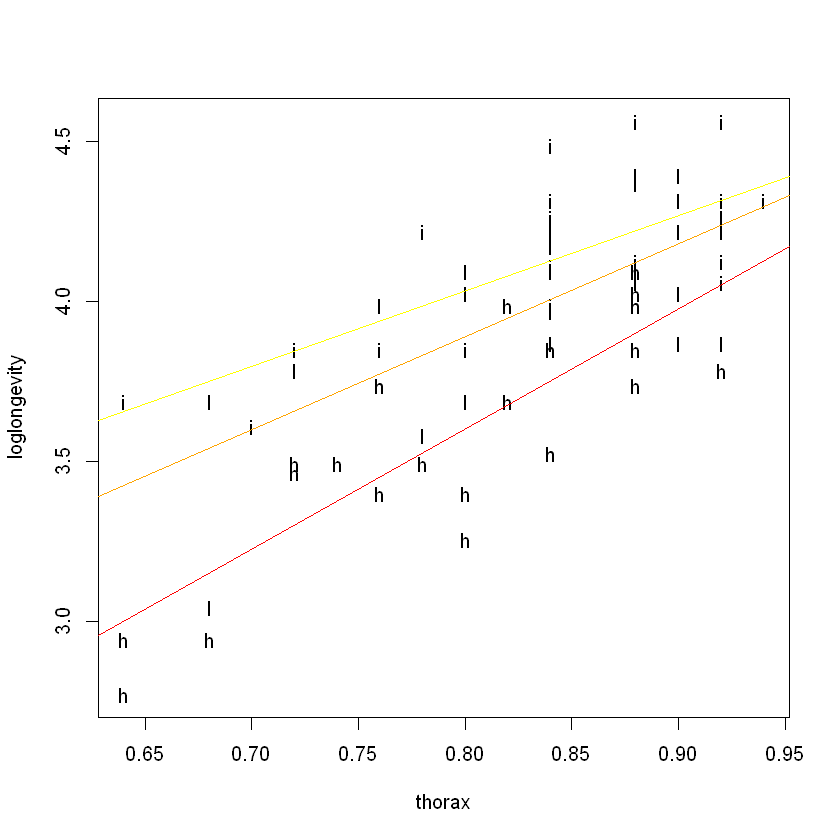

In [99]:
plot(loglongevity~thorax,pch=as.character(activity), data=fruitflies)
abline(lm(loglongevity~thorax,data=high), col='red')
abline(lm(loglongevity~thorax,data= low), col='orange')
abline(lm(loglongevity~thorax,data=isolated), col='yellow')

In [106]:
highaov = lm(loglongevity~thorax,data=high)
lowaov = lm(loglongevity~thorax,data= low)
isoaov = lm(loglongevity~thorax,data=isolated)

In [107]:
anova(highaov); anova(lowaov); anova(isoaov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
thorax,1,2.076008,2.07600844,53.61423,1.892357e-07
Residuals,23,0.890588,0.03872122,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
thorax,1,1.005705,1.00570486,19.81031,0.0001829714
Residuals,23,1.167635,0.05076674,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
thorax,1,0.9510971,0.95109706,31.00468,1.152548e-05
Residuals,23,0.7055460,0.03067591,NA,NA


### For all three groups of sexual activity, the dependence of logevity on thorax length is demontrated to be significant and similar

### 3d)  Which of the two analyses, without or with thorax length, do you prefer? Is one of the analyses wrong?

#### As we can see from the graphical representation, thorax length definitely influences longevity, however it produces parralel lines between the groups, indicating the effect of thorax length is almost identical between the groups. Also, our anova results of the interaction between thorax length and activity showed no significant results, so these two variables are independent. Although neither analysis is wrong (I THINK), if the aim is to anbalyse effect of sexual activity on longevity, the thorax length should not be included (SO FOR OUR HYPOTHESIS, THE TEST WITH THORAX LENGTH IS WRONG, BUT THE ACTUAL TEST ISN'T)

### 3e)  Perform the ancova analysis with the number of days as the response, rather than its logarithm. Was it wise to use the logarithm as response?

#### I'll proceed without the thorax length:

In [115]:
fruitaov_e = lm(longevity ~ activity, data=fruitflies)
shapiro.test(residuals(fruitaov_e)); anova(fruitaov_e)


	Shapiro-Wilk normality test

data:  residuals(fruitaov_e)
W = 0.99015, p-value = 0.834


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
activity,2,8239.227,4119.613,19.31099,1.93054e-07
Residuals,72,15359.760,213.330,NA,NA


### When using the logarithm, we encountered non-normal residuals, requiring use of either a kruskal wallis (which we did) or a permutation test. Not using the logarithm allowed for an Ancova. Using the logarithm simply made the data non-parametric without adding any change to our test results